# Home task 

## Home Task 1. Hypothesis Testing for Proportions

A company believes that percentage of resident in Ternopil own vehicle is `60%` or less. <br>
Sales manager disagree. He conducted a test surveying `250` residents and `170` responded yes to owning a vehicle. <br>

State the null hypothesis and alternative hypothesis. <br>
At 10% significance level, is there enough evidence to reject the null hypothesis?


**Note**: 
- Significance level is opposite to confidence level e.g. 10% significance level means 90% of confidence level.
- This is one taled task since is percentage `60%` **OR LESS**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f_gauss(x):
    return np.exp(-x**2 / 2) / np.sqrt(2*np.pi)

In [3]:
# init data
p = 0.6
n_all = 250
x_yes = 170
significance = 0.9

rejection_area = 1-significance

FTR = significance/2

print(f"Fail to reject = {FTR}")

Fail to reject = 0.45


In [4]:
z = 1.65  # From table
z

1.65

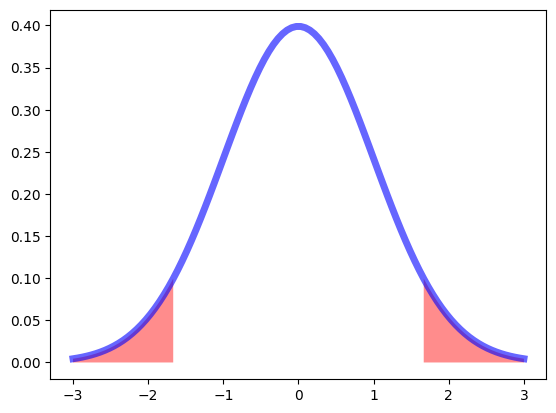

In [5]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3, 3, 100)
ax.plot(x, f_gauss(x), 'b-', lw=5, alpha=0.6, label='Gauss')
x_left = x[x < -z]
x_right = x[x > z]
ax.fill_between(x_left, 0, f_gauss(x_left), facecolors='red', alpha=FTR)
ax.fill_between(x_right, 0, f_gauss(x_right), facecolors='red', alpha=FTR)

#### Using [Z SCORE TABLE](https://www.z-table.com/) table I compute cumulative area $A_{C}= 0.9+0.05= 0.95$ , and then get the same $z$ value = `1.65`


In [6]:
Ac = significance+rejection_area/2
Ac

0.95

In [7]:
from scipy.stats import norm
norm.ppf(.5), norm.ppf(.95)

(0.0, 1.6448536269514722)

In [8]:
norm.ppf(norm.cdf(1.65)), norm.cdf(norm.ppf(0.90))

(1.6500000000000001, 0.8999999999999999)

z_critical= 1.6448536269514722, z_calculated= 2.5819888974716134


Text(2.5819888974716134, 0.014231864256978333, '2.58')

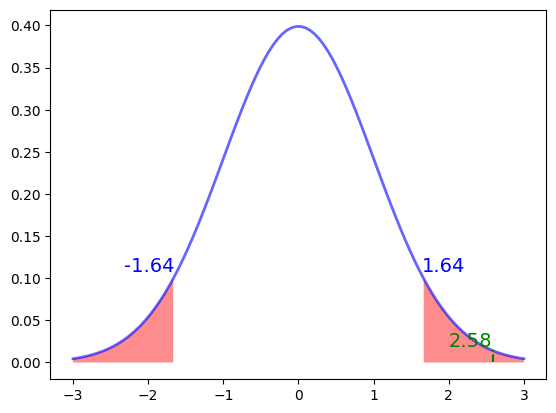

In [9]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3, 3, 100)

q = 1 - p
p1 = x_yes/n_all

z_critical = norm.ppf(0.950)

z_c = (p1 - p) / (np.sqrt(p*q/n_all))

print(f'z_critical= {z_critical}, z_calculated= {z_c}')

ax.plot(x, norm.pdf(x), 'b-', lw=2, alpha=0.6, label='Gauss')
x_left = x[x < -z_critical]
x_right = x[x > z_critical]
ax.fill_between(x_left, 0, norm.pdf(x_left), facecolors='red', alpha=0.45)
ax.fill_between(x_right, 0, norm.pdf(x_right), facecolors='red', alpha=0.45)


ax.plot([z_c, z_c], [0, norm.pdf(z_c)], 'g--')

ax.text(-z_critical, norm.pdf(z_critical),
        '{:.3}'.format(-z_critical), ha='right', va='bottom', color='blue', fontsize=14)
ax.text(z_critical, norm.pdf(z_critical), '{:.3}'.format(
    z_critical), ha='left', va='bottom', color='blue', fontsize=14)
ax.text(z_c, norm.pdf(z_c), '{:.3}'.format(z_c),
        ha='right', va='bottom', color='g', fontsize=14)

# RESULT
<hr/>

Text(2.5819888974716134, 0.014231864256978333, '2.58')

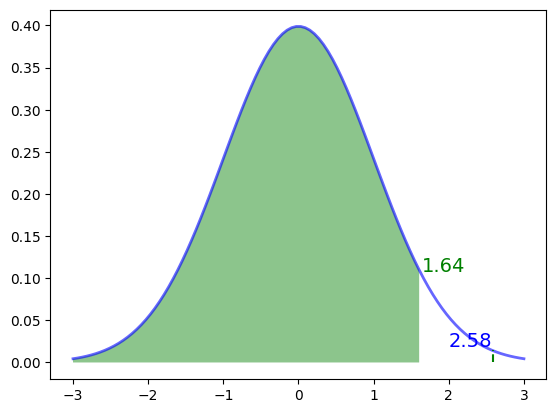

In [10]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3, 3, 100)

ax.plot(x, norm.pdf(x), 'b-', lw=2, alpha=0.6, label='Gauss')
x_left = x[x < z_critical]
ax.fill_between(x_left, 0, norm.pdf(x_left), facecolors='g', alpha=0.45)
ax.plot([z_c, z_c], [0, norm.pdf(z_c)], 'g--')
ax.text(z_critical, norm.pdf(z_critical), '{:.3}'.format(
    z_critical), ha='left', va='bottom', color='green', fontsize=14)
ax.text(z_c, norm.pdf(z_c), '{:.3}'.format(z_c),
        ha='right', va='bottom', color='b', fontsize=14)

<hr/>

### Expected result

<img src = "hometask1_expected.png" height=500 width= 700 align="left">


## Home Task 2. Hypothesis Testing Difference of Two Means 

A business owner is in the process of deciding whether or not to invest in a new factory that refines oil in order to meet the high demand that commodity. A test showed that the old factory refines oil at a mean rate of `3.1L` per second at a standard deviation of `1.0` using a samp of `40`. <br>
The new factory was measured to refine oil at a mean rate of `3.8L` per second at a standard deviation of `1.5` using a sample of `36`.

Determine if there is any major difference at 10% significance level

**Note**: Since sample size is larger than 30, you may use normal distribution to compute the **z-critical**. 

To compute the **z-value** (z-calculated for two means) use the same formula as for **t-value** above: 

$$\large{ z_{calculated}  = \frac {(\bar{x_1}-\bar{x_2}) - (\mu_1 - \mu_2)}
{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}}
$$

In [11]:
import scipy.stats as stats

# init data
# old-factory
mean1 = 3.1
std_dev1 = 1.0
n1 = 40

# new-factory
mean2 = 3.8
std_dev2 = 1.5
n2 = 36

alpha = 0.10

In [12]:
z = (mean1 - mean2) / ((std_dev1**2/n1 + std_dev2**2/n2) ** 0.5)
z

-2.3664319132398455

In [13]:
z_critical = stats.norm.ppf(1 - alpha/2)
z_critical

1.6448536269514722

In [14]:
if abs(z) > z_critical:
    print("Reject the null hypothesis")
else:
    print("Do not reject the null hypothesis")

Reject the null hypothesis
